<span style="color:darkblue"> ⚠️ <b>IMPORTANTE</b></span>: <b>CORRE A CAIXA DE CÓDIGO SEGUINTE</b> antes de começares as tuas experiências!
<br><span style="color:gray">(Para isso, clica na caixa e depois carrega no botão ![image.png](./assets/play.PNG) que está na barra acima).</span>

In [ ]:
:opt no-lint
:l scripts/ensico.hs
putStrLn (['F']++['e','i','t']++"o!")

---

# Tabela de um Grafo
> **Computação - Ano 2 - Aula 17** <br>
> © 2020-2024 ENSICO. Todos os direitos reservados
---


<br>
<br>Já percebemos que o Jupyter não compreende imagens nem esquemas! 🤓

O Jupyter pode ajudar-nos a resolver problemas sobre um grafo, mas, primeiro, temos de saber escrever grafos de uma maneira que o Jupyter compreenda...
<br>Já aprendemos uma forma: **representar um grafo usando uma lista de pares**.

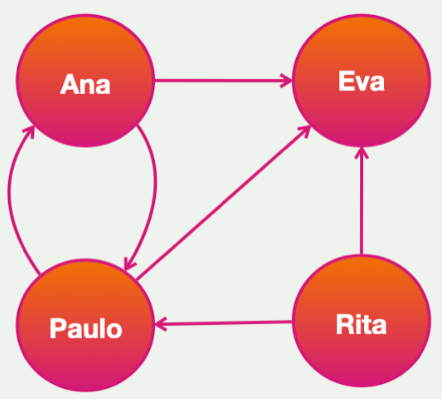

No grafo acima, uma seta significa "é seguidor de". Por exemplo, a Ana é seguidora da Eva.
<br>Este grafo pode ser escrito no Jupyter usando a seguinte **lista de pares**:

In [ ]:
listaDePares = [ ("Ana","Eva") , ("Ana","Paulo") , ("Paulo","Ana") , ("Paulo","Eva") , ("Rita","Paulo") , ("Rita","Eva") ]

<br>
<br>
<br>Mas nem sempre uma lista de pares é a maneira mais útil de representar grafos no Jupyter...
<br>
<br>Imaginem que queremos que o Jupyter calcule <b style="background:lightblue">quantos seguidores tem cada pessoa</b> usando a <code>listaDePares</code>.
<br>A instrução que tínhamos de escrever para o Jupyter nos dizer <i>"a Ana tem 1 seguidor, a Eva tem 3 seguidores, o Paulo tem 2 seguidores e a Rita não tem seguidores"</i> era esta:

In [ ]:
[ (p, listaDePares |> filter(\par -> par|>snd==p) |> map fst |> length) | p<-(( listaDePares|>map fst ++ listaDePares|>map snd )|>nub|>sort) ]

[("Ana",1),("Eva",3),("Paulo",2),("Rita",0)]

<br>
<span style="font-size:2rem">🤯🤯🤯</span>

---

## Representar um grafo através de uma tabela

Outra maneira de representar este grafo no Jupyter é usando uma tabela como se mostra a seguir.

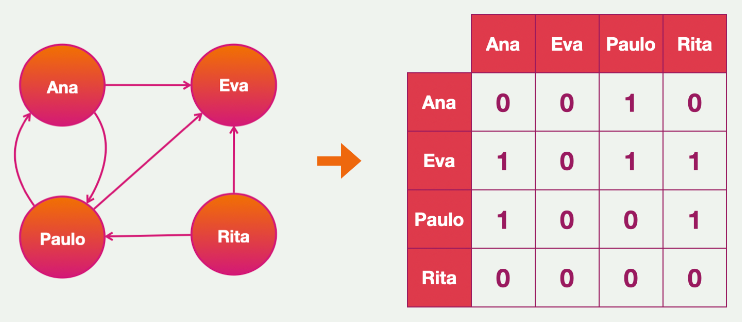

Para escrever algo parecido com uma tabela no Jupyter, podemos utilizar uma **lista de listas**:

In [ ]:
tabela = [ [0,0,1,0],
           [1,0,1,1],
           [1,0,0,1],
           [0,0,0,0] ]

(Nós preferimos escrever uma lista em cada linha para isto parecer uma tabela, mas é apenas uma lista de listas.)

In [ ]:
tabela

[[0,0,1,0],[1,0,1,1],[1,0,0,1],[0,0,0,0]]

<br>
<br>A partir desta tabela, como é que resolvemos o mesmo problema de calcular <b style="background:lightblue">quantos seguidores tem cada pessoa?</b>
<br>Começamos por observar que, em cada linha, existem tantos <b>1</b>s quantos os seguidores dessa pessoa:

|         |Ana|Eva|Paulo|Rita|  |  |
|:-       |:-:|:-:|:-:  |:-: |:-|:-|
|**Ana**  |0|0|1|0| → a Ana tem **1 seguidor** (Paulo) | e 0+0+1+0=**1** |
|**Eva**  |1|0|1|1| → a Eva tem **3 seguidores** (Ana,Paula,Rita) | e 1+0+1+1=**3** |
|**Paulo**|1|0|0|1| → o Paulo tem **2 seguidores** (Ana,Rita) | e 1+0+0+1=**2** |
|**Rita** |0|0|0|0| → a Rita tem **0 seguidores** | e 0+0+0+0=**0** |

Então, para pôr o Jupyter a responder a esta pergunta, basta mandá-lo somar cada linha da tabela!

In [ ]:
tabela |> map sum

[1,3,2,0]

Feito! O Jupyter está a dizer-nos que a Ana tem **1** seguidor, a Eva tem **3**, o Paulo tem **2** e a Rita tem **0**.

E a instrução `tabela |> map sum` é bem mais simples do que
<br><code>[ (p, listaDePares |> filter(\par -> par|>snd==p) |> map fst |> length) | p<-(( listaDePares|>map fst ++ listaDePares|>map snd )|>nub|>sort) ]</code> 
<br><span style="font-size:2rem">🥳😌🙏🙏🙏</span>
<br>
<br>
<br>
<h3> Outros exercícios:</h3>

(❔) Que instrução precisamos de escrever para obter a lista com o número de seguidores de cada pessoa, mas ordenada **por ordem crescente**?

In [ ]:
tabela |> map sum |> ...

[0,1,2,3]

(❔) Que instrução nos diz o **maior número de seguidores** (que algum dos amigos tem)?

In [ ]:
...

3

#### Soluções

In [ ]:
tabela |> map sum |> sort

[0,1,2,3]

In [ ]:
tabela |> map sum |> maximum

3

---
## E um grafo com etiquetas?

Se o grafo tiver etiquetas, podemos fazer uma tabela parecida, mas em vez de pormos **1** quando existe uma seta, pomos o valor da etiqueta.

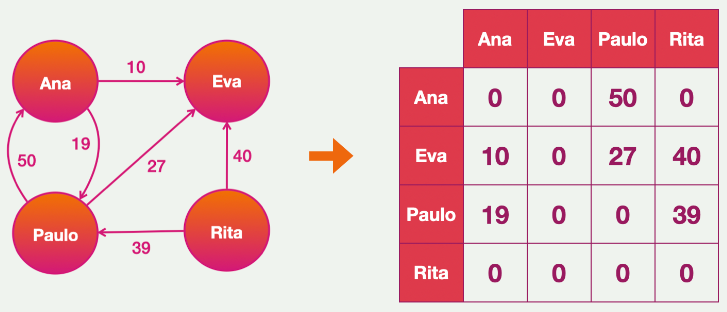

E, para escrever a tabela no Jupyter, voltamos a usar uma **lista de listas**:

In [ ]:
likes = [ [  0, 0, 50,  0],
          [ 10, 0, 27, 40],
          [ 19, 0,  0, 39],
          [  0, 0,  0,  0] ]

In [ ]:
likes

[[0,0,50,0],[10,0,27,40],[19,0,0,39],[0,0,0,0]]

<br>
<br><u>Observa que é simples resolvermos os próximos 2 problemas usando a <b>lista de listas</b>.</u>
<br>
<br>(❔) Saber o <b>número total de likes</b> colocados em cada perfil:

In [ ]:
likes |> map sum

[50,77,58,0]

<span style="color:#aaa">(com um simples `map sum`, o Jupyter diz-nos que a Ana recebeu **50** likes no total, a Eva recebeu **77**, o Paulo recebeu **58** e a Rita recebeu **0** likes)</span>
<br>
<br>(❔) Calcular o número **total de likes** nos perfis de todos os utilizadores:

In [ ]:
likes |> map sum |> sum

185

<span style="color:#aaa">(simples também! 😎)</span>
<br>
<br>
<br><u>Mas, se fôssemos resolver estes problemas usando a <b>lista de pares</b> do grafo...</u>

In [ ]:
pares = [ (("Ana","Eva"),10) , (("Ana","Paulo"),19) , (("Paulo","Ana"),50) , (("Paulo","Eva"),27) , (("Rita","Paulo"),39) , (("Rita","Eva"),40) ]

(❔) Saber o <b>número total de likes</b> colocados em cada perfil:

In [ ]:
[ (p, pares |> filter(\par -> par|>fst|>snd==p) |> map snd |> sum) | p<-(( pares|>map fst|>map fst ++ pares|>map fst|>map snd )|>nub) ] |> sort

[("Ana",50),("Eva",77),("Paulo",58),("Rita",0)]

(❔) Calcular o número **total de likes** nos perfis de todos os utilizadores:

In [ ]:
[ (p, pares |> filter(\par -> par|>fst|>snd==p) |> map snd |> sum) | p<-(( pares|>map fst|>map fst ++ pares|>map fst|>map snd )|>nub) ] |> map snd |> sum

185

<span style="font-size:2rem">😱🤯😭</span>